**단어 수준의 원-핫 인코딩하기**

In [ ]:
# one-hot encoding
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index)+1

max_length = 10
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

**문자 수준 원-핫 인코딩하기**

In [ ]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable #출력 가능한 모든 아스키(ASCII) 문자
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1 ))

for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i,j,index] = 1.

**케라스를 사용한 단어 수준의 원-핫 인코딩하기**

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

9개의 고유한 토큰을 찾았습니다.


**해싱 기법을 사용한 단어 수준의 원-핫 인코딩하기**

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i,j,index] = 1.

**Embedding 층을 사용하여 단어 임베딩 학습하기**

In [ ]:
# Embedding 층의 객체 생성
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64) #임베딩 층은 적어도 2개의 매개변수 받음
# 가능한 토큰의 개수(여기서는 1000이고 단어 인덱스 최댓값 + 1임)와 임베딩 차원(여기서 64)
# (samples, sequence_length) 각 샘플은 정수의 시퀀스

In [ ]:
# Embedding 층에 사용할 IMDB 데이터 로드
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 #특성으로 사용할 단어 수
maxlen = 20 #사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용)

(x_train, y_train),(x_test,y_test) = imdb.load_data(
    num_words = max_features) # 정수 리스트로 데이터 로드

x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# IMDB 데이터에 Embedding 층과 분류기 사용하기
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) # 나중에 임베딩 된 것을 flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정! 출력 크기는 (samples,maxlen,8)

model.add(Flatten()) #3D 임베딩 텐서를 (samples, maxlen*8)의 2D텐서로 펼치기

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 5s 3ms/step - loss: 0.6843 - acc: 0.5661 - val_loss: 0.6092 - val_acc: 0.7028
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5594 - acc: 0.7434 - val_loss: 0.5225 - val_acc: 0.7306
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4657 - acc: 0.7854 - val_loss: 0.4988 - va

**모든 내용을 적용하기 : 원본 텍스트에서 단어 임베딩까지**

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/케라스 창시자에게 배우는 딥러닝')
os.getcwd()

'/content/drive/MyDrive/케라스 창시자에게 배우는 딥러닝'

In [ ]:
# !unzip aclImdb.zip

In [ ]:
# 데이터 불러오기

import os

imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [ ]:
# 데이터 토큰화
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 #100개 단어 이후 버림
training_samples = 200 #훈련 샘플은 200개
validation_samples = 10000 # 검증 샘플은 1만개
max_words = 10000 # 데이터셋에서 가장 빈도 높은 1만 개의 단어만 사용
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' %len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기:',data.shape)
print('레이블 텐서의 크기:',labels.shape)

indices = np.arange(data.shape[0]) # 데이터 훈련/검증으로 분할 
np.random.shuffle(indices) # 샘플이 순서대로 있어서 데이터 섞기
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

39811개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (5047, 100)
레이블 텐서의 크기: (5047,)


In [ ]:
import time
import sys

def Schedule(blocknum, blocksize, totalsize):

    recv_size = blocknum * blocksize
    
    # Set download progress bar
    f = sys.stdout
    pervent = recv_size / totalsize
    percent_str = "%.2f%%" % (pervent * 100)
    n = round(pervent * 50)
    s = ('#' * n).ljust(50, '-')
    
    f.write(percent_str.ljust(8, ' ') + '[' + s + ']')
    f.flush()

    f.write('\r')

In [ ]:
# # 파일 처음 다운받을 때만

# import urllib.request
# link = 'http://nlp.stanford.edu/data/glove.6B.zip'
# fn = './glove.6B.zip'
# urllib.request.urlretrieve(link, fn, Schedule)

('./glove.6B.zip', <http.client.HTTPMessage at 0x7f5ea8f598d0>)

In [ ]:
# # 파일 unzip
# !unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
# GloVe 단어 임베딩 내려받기
glove_dir = './'

embeddings_index={}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다


In [ ]:
# GloVe 단어 임베딩 행렬 준비
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector # 임베딩 인덱스에 없는 단어는 모두 0

In [ ]:
# 모델 정의
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델에 GloVe 임베딩 로드하기

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # 임베딩 층 동결

In [ ]:
# 모델 훈련과 평가
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 87ms/step - loss: 0.2754 - accuracy: 0.7728 - val_loss: 4.0565e-05 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 58ms/step - loss: 6.0536e-04 - accuracy: 1.0000 - val_loss: 3.1563e-05 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 0s 60ms/step - loss: 1.1737e-04 - accuracy: 1.0000 - val_loss: 2.5779e-05 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 0s 58ms/step - loss: 7.0471e-05 - accuracy: 1.0000 - val_loss: 2.1734e-05 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 58ms/step - loss: 7.1093e-05 - accuracy: 1.0000 - val_loss: 1.8741e-05 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 60ms/step - loss: 6.9136e-05 - accuracy: 1.0000 - val_loss: 1.6310e-05 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 60ms/step - loss: 2.0549e-05 - accuracy: 1.0000 - val_loss: 1.3923e-0

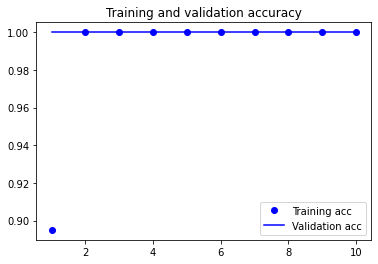

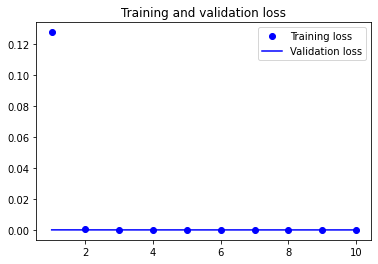

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 사전 훈련된 단어 임베딩 사용 X 같은 모델 훈련하기
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 82ms/step - loss: 0.6308 - accuracy: 0.6477 - val_loss: 0.2397 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 57ms/step - loss: 0.1442 - accuracy: 1.0000 - val_

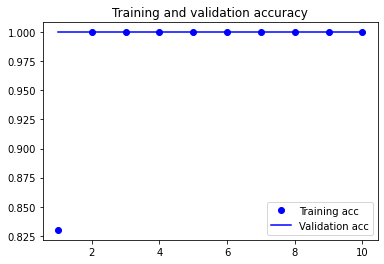

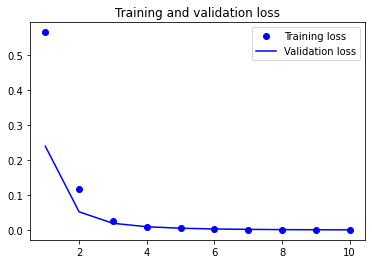

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 테스트 데이터 토큰화하기

test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
# 평가
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)